In [11]:
import torch
import fastai

# Check version of libs
print(torch.__version__)
print(fastai.__version__)

2.2.0+cpu
2.7.14


In [12]:
# Build first model
# Program that can know whether picture or noy
from fastai.vision.all import *
from ipywidgets import widgets

In [13]:
# data
path = untar_data(URLs.PETS)/'images'

# labeling function
def is_cat(x): return x[0].isupper() # cat
def is_dog(x): return x[0].islower() # dog

In [23]:
# dataloaders
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.176576,0.030351,0.989851,11:26


epoch,train_loss,valid_loss,accuracy,time
0,0.072726,0.020779,0.990528,14:21
1,0.031515,0.008636,0.996617,26:21


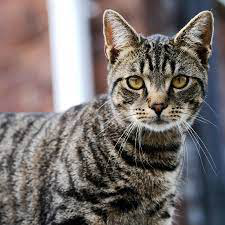

In [71]:
# check model
# widget to download picture
from PIL import Image

# Open an image file
img = Image.open('cat.png')
img

In [72]:
# img = PILImage.create(upload.data[-1]) # picture
pred, _, prob = learn.predict(img)
print(f'Is this cat?: {pred}')
print(f'Probability: {prob[1].item():.3f}')


Is this cat?: True
Probability: 1.000
